In [1]:
import pandas as pd
import numpy as np
from palmerpenguins import load_penguins
import graphviz
from IPython.display import SVG, display
import ipywidgets as widgets
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from graphviz import Source
from sklearn.preprocessing import LabelEncoder
import matplotlib

In [2]:
penguins_df = load_penguins()
penguins_df.head()

In [3]:
penguins_df.dtypes

In [4]:
# Dropping the year variable and the null values
penguins_df.drop('year', axis = 1, inplace = True)
penguins_df.dropna(inplace = True)
penguins_df.head()

In [5]:
#Label Encoding the categorical values in penguins dataset
le = LabelEncoder()
penguins_df['species'] = le.fit_transform(penguins_df['species'])
penguins_df['island'] = le.fit_transform(penguins_df['island'])
penguins_df['sex'] = le.fit_transform(penguins_df['sex'])

In [97]:
penguins_df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.1,18.7,181.0,3750.0,1
1,0,2,39.5,17.4,186.0,3800.0,0
2,0,2,40.3,18.0,195.0,3250.0,0
4,0,2,36.7,19.3,193.0,3450.0,0
5,0,2,39.3,20.6,190.0,3650.0,1
6,0,2,38.9,17.8,181.0,3625.0,0
7,0,2,39.2,19.6,195.0,4675.0,1
12,0,2,41.1,17.6,182.0,3200.0,0
13,0,2,38.6,21.2,191.0,3800.0,1
14,0,2,34.6,21.1,198.0,4400.0,1


In [6]:
#Separating the response and predictors
X = penguins_df.drop('species', axis = 1)
y = penguins_df['species']

In [7]:
#Identifying the important features
estimator = DecisionTreeClassifier(criterion = 'gini', max_depth = 3)
estimator.fit(X,y)
estimator.feature_importances_

array([0.01783828, 0.37885616, 0.05266536, 0.5506402 , 0.        ,
       0.        ])

In [8]:
X.columns

Index(['island', 'bill_length_mm', 'bill_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex'],
      dtype='object')

In [9]:
#Importing Bank Marketing Dataset
bmd = pd.read_csv('D:/[FCO] AppliedAICourse - Applied Machine Learning Course/1.0 CSV files/Bank Marketing Dataset/bank.csv')
bmd.head()

In [112]:
bmd.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [113]:
bmd['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [114]:
bank_data = bmd.copy()

In [115]:
bank_data['job'] = bank_data['job'].replace(['management', 'admin.'], 'white-collar')
bank_data['job'] = bank_data['job'].replace(['services','housemaid'], 'pink-collar')
bank_data['job'] = bank_data['job'].replace(['retired', 'student', 'unemployed', 'unknown'], 'other')

In [117]:
bank_data['job'].value_counts()

white-collar     3900
blue-collar      1944
technician       1823
other            1565
pink-collar      1197
self-employed     405
entrepreneur      328
Name: job, dtype: int64

In [118]:
bank_data['poutcome'].value_counts()

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

In [119]:
bank_data['poutcome'] = bank_data['poutcome'].replace(['other'] , 'unknown')
bank_data.poutcome.value_counts()

unknown    8863
failure    1228
success    1071
Name: poutcome, dtype: int64

In [18]:
bank_data.drop('contact', axis = 1, inplace = True)

In [120]:
#Mapping yes/no values to 1/0
bank_data['default_cat'] = bank_data['default'].map( {'yes':1, 'no':0} )
bank_data.drop('default', axis=1,inplace = True)

In [121]:
bank_data["housing_cat"]=bank_data['housing'].map({'yes':1, 'no':0})
bank_data.drop('housing', axis=1,inplace = True)

In [122]:
bank_data["loan_cat"]=bank_data['loan'].map({'yes':1, 'no':0})
bank_data.drop('loan', axis=1,inplace = True)

In [123]:
# day  : last contact day of the month
# month: last contact month of year
# Drop 'month' and 'day' as they don't have any intrinsic meaning
bank_data.drop('month', axis=1, inplace=True)
bank_data.drop('day', axis=1, inplace=True)

In [124]:
# values for "deposit" : yes/no
bank_data["deposit_cat"] = bank_data['deposit'].map({'yes':1, 'no':0})
bank_data.drop('deposit', axis=1, inplace=True)

In [125]:
# Map pdays=-1 into a large value (10000 is used) to indicate that it is so far in the past that it has no effect
bank_data.loc[bank_data['pdays'] == -1, 'pdays'] = 10000
# Create a new column: recent_pdays 
bank_data['recent_pdays'] = np.where(bank_data['pdays'], 1/bank_data.pdays, 1/bank_data.pdays)

# Drop 'pdays'
bank_data.drop('pdays', axis=1, inplace = True)

In [126]:
bank_with_dummies = pd.get_dummies(data=bank_data, columns = ['job', 'marital', 'education', 'poutcome'], \
                                   prefix = ['job', 'marital', 'education', 'poutcome'])

In [98]:
bank_with_dummies.head(10)

,age,balance,duration,campaign,previous,default_cat,housing_cat,loan_cat,deposit_cat,recent_pdays,...,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,education_unknown,poutcome_failure,poutcome_success,poutcome_unknown
0,59,2343,1042,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
1,56,45,1467,1,0,0,0,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
2,41,1270,1389,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
3,55,2476,579,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
4,54,184,673,2,0,0,0,0,1,0.0001,...,0,1,0,0,0,1,0,0,0,1
5,42,0,562,2,0,0,1,1,1,0.0001,...,0,0,1,0,0,1,0,0,0,1
6,56,830,1201,1,0,0,1,1,1,0.0001,...,0,1,0,0,0,1,0,0,0,1
7,60,545,1030,1,0,0,1,0,1,0.0001,...,1,0,0,0,1,0,0,0,0,1
8,37,1,608,1,0,0,1,0,1,0.0001,...,0,1,0,0,1,0,0,0,0,1
9,28,5090,1297,3,0,0,1,0,1,0.0001,...,0,0,1,0,1,0,0,0,0,1


In [26]:
X1 = bank_with_dummies.drop('deposit_cat', axis = 1)
y1 = bank_with_dummies['deposit_cat']

In [27]:
#Function to plot decision tree
def plot_tree(dataset, crit, split, depth, max_feat):
    if dataset == 'Penguin':
        estimator1 = DecisionTreeClassifier(criterion = crit, splitter = split, max_depth = depth, max_features = max_feat, random_state = 0)
        estimator1.fit(X,y)
        plt.figure(figsize = (10,8))
        graph1 = Source(tree.export_graphviz(estimator1, out_file=None, feature_names=X.columns, class_names=['Adelie', 'Chinstrap', 'Gentoo'], filled = True))
   
        display(SVG(graph1.pipe(format = 'svg')))
        
    if dataset == 'Bank Marketing':
        estimator2 = DecisionTreeClassifier(criterion = crit, splitter = split, max_depth = depth, max_features = max_feat, random_state = 0)
        estimator2.fit(X1,y1)
        plt.figure(figsize = (10,8))
        graph2 = Source(tree.export_graphviz(estimator2, out_file=None, feature_names=X1.columns, class_names=['No', 'Yes'], filled = True))
   
        display(SVG(graph2.pipe(format = 'svg')))

#Function to plot decision boundary using contours
def decision_boundary(dataset, crit, split, depth, max_feat):
    if dataset == 'Penguin':
        n_classes = 3
        plot_colors = "ryb"
        plot_step = 0.02



        for pairidx, pair in enumerate([[1, 2], [1, 3], [2, 3]]):
            # We only take the two corresponding features
            X_s = X.iloc[:, pair]
            y_s = y

            # Train
            clf = DecisionTreeClassifier(criterion = crit, splitter = split, max_depth = depth, max_features = max_feat).fit(X_s, y_s)

            # Plot the decision boundary
            plt.subplot(1, 3, pairidx + 1)
            

            x_min, x_max = X_s.iloc[:, 0].min() - 1, X_s.iloc[:, 0].max() + 1
            y_min, y_max = X_s.iloc[:, 1].min() - 1, X_s.iloc[:, 1].max() + 1
            xx, yy = np.meshgrid(
                np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
            )
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

            plt.xlabel(X.columns[pair[0]])
            plt.ylabel(X.columns[pair[1]])

            # Plot the training points
            for i, color in zip(range(n_classes), plot_colors):
                idx = np.where(y == i)
                plt.scatter(
                    X_s.reindex(index = idx, columns = X_s[X_s.columns[0]]),
                    X_s.reindex(index = idx, columns = X_s[X_s.columns[1]]),
                    c=color,
                    label=i,
                    cmap=plt.cm.RdYlBu,
                    edgecolor="black",
                    s=15,
                )

        plt.legend(loc="lower right", borderpad=0, handletextpad=0)
        plt.axis("tight")
        

        plt.show()
        
    if dataset == 'Bank Marketing':
        n_classes = 2
        plot_colors = "rb"
        plot_step = 50



        for pairidx, pair in enumerate([[1, 2]]):
            # We only take the two corresponding features
            X_s_1 = X1.iloc[:, pair]
            y_s_1 = y1

            # Train
            clf = DecisionTreeClassifier(criterion = crit, splitter = split, max_depth = depth, max_features = max_feat).fit(X_s_1, y_s_1)

            # Plot the decision boundary

            x_min, x_max = X_s_1.iloc[:, 0].min() - 1, X_s_1.iloc[:, 0].max() + 1
            y_min, y_max = X_s_1.iloc[:, 1].min() - 1, X_s_1.iloc[:, 1].max() + 1
            xx, yy = np.meshgrid(
                np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
            )
            plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
            Z = Z.reshape(xx.shape)
            cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

            plt.xlabel(X1.columns[pair[0]])
            plt.ylabel(X1.columns[pair[1]])

            # Plot the training points
            for i, color in zip(range(n_classes), plot_colors):
                idx = np.where(y == i)
                plt.scatter(
                    X_s_1.reindex(index = idx, columns = X_s_1[X_s_1.columns[0]]),
                    X_s_1.reindex(index = idx, columns = X_s_1[X_s_1.columns[1]]),
                    c=color,
                    label=i,
                    cmap=plt.cm.RdBu,
                    edgecolor="black",
                    s=15,
                )

        plt.legend(loc="lower right", borderpad=0, handletextpad=0)
        plt.axis('tight')
        plt.show()

        

In [101]:
#Creating a grid
grid = widgets.GridspecLayout(50, 70, height = '800px', width = '800px')
max_depth = widgets.IntSlider(
    value=1,
    min=0,
    max=10,
    step=1,
    description='',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='d',
    layout= widgets.Layout(width='180px')
)
grid[3, 0:3] = widgets.Button(description = 'Max Depth', tooltip = 'The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples')
grid[4,0:3] = max_depth

grid[7, 0:3] = widgets.Button(description = 'Split', tooltip = 'The strategy used to choose the split at each node.')
best_split = widgets.Dropdown(
    options=['best', 'random'],
    value='best',
    description='',
    disabled=False,
    layout= widgets.Layout(width='150px'),
)
grid[8,0:3] = best_split


grid[10, 0:3] = widgets.Button(description = 'Criterion', tooltip = 'The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.')
criterion = widgets.Dropdown(
    options=['gini', 'entropy'],
    value='gini',
    description='',
    disabled=False,
    layout= widgets.Layout(width='150px')
)
grid[11,0:3] = criterion

grid[13, 0:3] = widgets.Button(description = 'Max Features', tooltip = 'The number of features to consider when looking for the best split')
max_features =  widgets.Dropdown(
    options=['sqrt', 'log2'],
    value='sqrt',
    description='',
    disabled=False,
    layout= widgets.Layout(width='150px')
)

grid[14,0:3] = max_features

grid[16, 0:3] = widgets.Button(description = 'Dataset')
dataset =  widgets.Dropdown(
    options=['Penguin', 'Bank Marketing'],
    value='Penguin',
    description='',
    disabled=False,
    layout= widgets.Layout(width='150px')
)

grid[17, 0:3] = dataset
grid[:26,20:] =  widgets.interactive_output(plot_tree, {'dataset':dataset,
                                    'crit': criterion,
                                    'split': best_split,
                                    'depth': max_depth,
                                    'max_feat': max_features})

# grid[18, 16:18] = widgets.Button(description = 'Decision Boundary', layout= widgets.Layout(width='210px'))
grid[27, 26] = widgets.Button(description = 'Decision Boundary', layout = widgets.Layout(width = '210px'))
grid[28:50,15:] =  widgets.interactive_output(decision_boundary, {'dataset':dataset,
                                    'crit': criterion,
                                    'split': best_split,
                                    'depth': max_depth,
                                    'max_feat': max_features})
grid

GridspecLayout(children=(Button(description='Max Depth', layout=Layout(grid_area='widget001'), style=ButtonSty…

In [110]:
#Function to plot accuracy
def plot_accuracy(X, y, X1, y1):
    depth_list_penguins = []
    accuracy_list_depth_penguins = []
    depth_list_bmd = []
    accuracy_list_depth_bmd = []

    for max_depth in range(1, 11):
        estimator1 = DecisionTreeClassifier(max_depth = max_depth, splitter = 'best', criterion = 'gini', max_features = 'sqrt', random_state = 0).fit(X,y)
        accuracy_list_depth_penguins.append(round(estimator1.score(X,y), 2))
        depth_list_penguins.append(max_depth)
        
        estimator2 = DecisionTreeClassifier(max_depth = max_depth, splitter = 'best', criterion = 'gini', max_features = 'sqrt', random_state = 0).fit(X1,y1)
        accuracy_list_depth_bmd.append(round(estimator2.score(X1,y1), 2))
        depth_list_bmd.append(max_depth)
    
    plt.figure(figsize = (20,6))
    plt.rcParams['axes.facecolor'] = 'white'
    plt.subplot(1,2,1)
    plt.scatter(depth_list_penguins, accuracy_list_depth_penguins, s = 50, marker = 'o')
    plt.plot(depth_list_penguins, accuracy_list_depth_penguins, linewidth = 2, color = 'r')
    for i, txt in enumerate(accuracy_list_depth_penguins):
        plt.annotate(txt, (depth_list_penguins[i], accuracy_list_depth_penguins[i] + 0.01), color = 'black')
    plt.ylim([0.7, 1.05])
    plt.grid()
    
    plt.xlabel('Max Depth', fontweight = 'bold')
    plt.ylabel('Accuracy', fontweight = 'bold')
    plt.title('Accuracy on the penguins dataset at different levels of depth', fontweight = 'bold')
    
    plt.subplot(1,2,2)
    plt.scatter(depth_list_bmd, accuracy_list_depth_bmd, s = 50, marker = 'o')
    plt.plot(depth_list_bmd, accuracy_list_depth_bmd, linewidth = 2, color = 'r')
    for i, text in enumerate(accuracy_list_depth_bmd):
        plt.annotate(text, (depth_list_bmd[i], accuracy_list_depth_bmd[i] + 0.01), color = 'black')
    plt.ylim([0.5, 0.9])
    plt.xlabel('Max Depth', fontweight = 'bold')
    plt.ylabel('Accuracy', fontweight = 'bold')
    plt.title('Accuracy on the bank marketing dataset at different levels of depth', fontweight = 'bold')
    plt.grid()

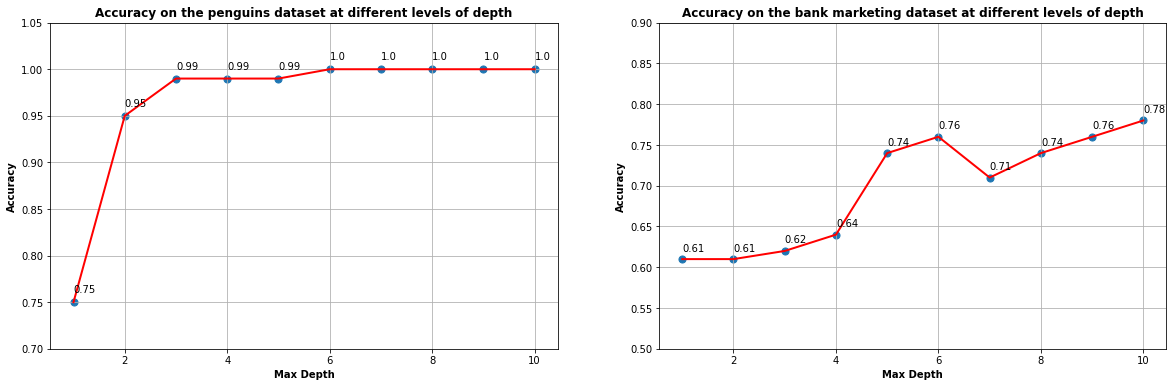

In [111]:
plot_accuracy(X,y, X1, y1)